RAO 3 Algorithm

Name    : <br>
SID     :

Algoritma RAO3 (Recent Advances in Optimization 3) adalah salah satu metode optimasi yang dikembangkan untuk menyelesaikan masalah optimasi yang kompleks dengan efektif. Algoritma ini menggunakan pendekatan yang menggabungkan strategi penyusunan ulang (reshuffling), adaptasi, dan penggunaan operator-operator efektif yang bertujuan untuk mengatasi keterbatasan dari algoritma optimasi generik dalam menemukan solusi yang optimal pada masalah yang memiliki banyak lokal minimum dan kompleksitas tinggi. Berikut adalah penjelasan umum tentang cara kerja RAO3:

- Inisialisasi: Seperti kebanyakan algoritma berbasis populasi, RAO3 memulai dengan menginisialisasi populasi solusi secara acak. Populasi ini terdiri dari sejumlah solusi potensial, di mana setiap solusi merepresentasikan sebuah titik dalam ruang pencarian.

- Evaluasi: Setiap anggota populasi dievaluasi berdasarkan fungsi tujuan yang didefinisikan. Evaluasi ini menentukan kualitas dari setiap solusi.

- Operator Adaptif: RAO3 menggunakan serangkaian operator adaptif yang dirancang untuk meningkatkan solusi saat ini. Operator ini dapat meliputi mutasi, crossover, dan seleksi, yang semuanya diadaptasi berdasarkan karakteristik dari masalah yang sedang dihadapi. Operator-operator ini bertujuan untuk menjaga keragaman dalam populasi dan mencegah konvergensi prematur pada solusi lokal.

- Penyusunan Ulang (Reshuffling): Salah satu fitur khas dari RAO3 adalah penggunaan strategi penyusunan ulang, di mana solusi yang kurang efektif atau yang sudah stagnan dalam populasi akan digantikan dengan solusi baru yang dihasilkan secara acak atau melalui teknik heuristik lainnya. Ini membantu dalam mengeksplorasi ruang pencarian lebih luas dan menghindari terjebak pada optimum lokal.

- Iterasi: Proses ini diulang dalam sejumlah iterasi, di mana pada setiap iterasi, solusi diperbarui menggunakan operator adaptif dan strategi reshuffling untuk mencoba mencapai solusi yang lebih baik.

- Konvergensi: Algoritma berlanjut sampai kriteria konvergensi terpenuhi, yang bisa berupa mencapai jumlah iterasi maksimum atau solusi tidak lagi mengalami perbaikan signifikan.

- Solusi Terbaik: Pada akhir iterasi, solusi terbaik dalam populasi dianggap sebagai solusi optimal untuk masalah yang diberikan.

# Install Dependicies

In [1]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


# Fungsi F16

Fungsi F16 didapat kan dari <br>

https://www.mathworks.com/matlabcentral/fileexchange/125645-drawing-code-for-mathematical-benchmark-functions

In [2]:
def f16(x1, x2):
    return 4*x1**2 - 2.1*x1**4 + (1/3)*x1**6 + x1*x2 - 4*x2**2 + 4*x2**4

# Kode

## Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import math

## Parameter

RAO 3 sendiri tidak memiliki parameter yang pasti. Namun ada beberapa parameter yang serupa dengan algoritma lainnya, yaitu Iterasi.

In [4]:
# Parameter RAO 3 Algorithm
n = 50  # Jumlah populasi
max_iter = 100 # Jumlah iterasi

## Inisialisasi Populasi

Ada beberapa baris kode yang akan di implemetasi sebagai Inisialisi Populasi. <br>

1. np.random.seed berguna untuk memastikan bilangan acak setidaknya dapat di replikasi karena memiliki seed yang sama
2. Array untuk menyimpan para kunang kunang
3. Menghitung fitness fireflies itu sendiri

In [5]:
np.random.seed(42)
pop = np.random.uniform((-0.7 * np.ones(2)), (0.7 * np.ones(2)), (n, 2))
fitness = f16(pop[:, 0], pop[:, 1]) 

In [6]:
# Simpan data untuk animasi
history = []
best_position = None
best_fitness = np.inf 
best_pop_index = np.argmin(fitness)

## RAO3 Algorithm

In [7]:
for t in range(max_iter):
    history.append(pop.copy())
    best = pop[np.argmin(fitness)]
    worst = pop[np.argmax(fitness)]
    
    for i in range(n):
        r = np.random.rand(2)  # Random coefficients
        k = np.random.choice(n, 1)[0]
        if fitness[i] < fitness[k]:
            new_sol = pop[i] + r[1] * (best - np.abs(worst)) + r[0] * (np.abs(pop[i]) - pop[k])
        else:
            new_sol = pop[i] + r[1] * (best - np.abs(worst)) + r[0] * (np.abs(pop[k]) - pop[i])
        
        new_sol = np.clip(new_sol, -0.7, 0.7)  # Ensure new solutions are within bounds
        new_fitness = f16(new_sol[0], new_sol[1])
        
        if new_fitness < fitness[i]:
            pop[i] = new_sol
            fitness[i] = new_fitness
            best_fitness = fitness[i]
            best_position = pop[i].copy()
            print("NEW BEST",best_position)


history.append(pop.copy())

NEW BEST [0.2923528  0.33427522]
NEW BEST [-0.5108219 -0.7      ]
NEW BEST [ 0.54041916 -0.58057714]
NEW BEST [-0.59333144  0.7       ]
NEW BEST [-0.10126981  0.00954224]
NEW BEST [ 0.15807514 -0.69348535]
NEW BEST [-0.28696322 -0.24258041]
NEW BEST [ 0.05696852 -0.44608468]
NEW BEST [-0.42840648  0.68730385]
NEW BEST [ 0.20884343 -0.06147555]
NEW BEST [ 0.02973562 -0.34427143]
NEW BEST [0.34984397 0.10254307]
NEW BEST [-0.04118492  0.65178065]
NEW BEST [-0.39132402 -0.26435928]
NEW BEST [-0.21560026 -0.61237827]
NEW BEST [ 0.17631083 -0.65355701]
NEW BEST [-0.10953985 -0.36392592]
NEW BEST [-0.33513473  0.4869166 ]
NEW BEST [ 0.10728552 -0.7       ]
NEW BEST [-0.20532469 -0.42585976]
NEW BEST [0.46549561 0.02668643]
NEW BEST [-0.17232122 -0.17526649]
NEW BEST [ 0.16625838 -0.3971982 ]
NEW BEST [ 0.00250196 -0.28822081]
NEW BEST [-0.02325092 -0.01011793]
NEW BEST [ 0.28116508 -0.07136347]
NEW BEST [ 0.31655105 -0.00404624]
NEW BEST [ 0.09069651 -0.58536751]
NEW BEST [-0.34035389 -0.561

## Buat GIF dari data yang telah ada

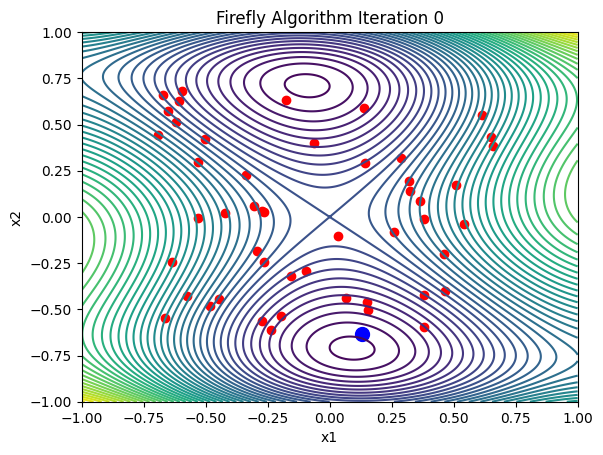

In [8]:
# Plot hasil dan animasi
X1 = np.linspace(-1, 1, 400)
X2 = np.linspace(-1, 1, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = f16(X1, X2)

fig, ax = plt.subplots()
contour = ax.contourf(X1, X2, Z, levels=50,cmap="viridis")
scatter = ax.scatter(pop[:, 0], pop[:, 1], c='red',zorder=5)

def update(frame):
    global best_firefly_index  # Access to the global best_firefly_index if needed
    ax.clear()
    ax.contour(X1, X2, Z, levels=50)
    fireflies_this_frame = history[frame]
    ax.scatter(fireflies_this_frame[:, 0], fireflies_this_frame[:, 1], c='red')
    # Update the best position if necessary, here assumed to still be valid
    ax.scatter(fireflies_this_frame[best_pop_index, 0], fireflies_this_frame[best_pop_index, 1], c='blue', s=100)
    ax.set_title(f'RAO3 Algorithm Iteration {frame}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=len(history), repeat=False) # type: ignore

# Simpan animasi sebagai GIF
ani.save("rao3_3.gif", writer='pillow',fps=10)